In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ls '/gdrive/MyDrive'

In [ ]:
!ls '/gdrive/MyDrive/Bank internship'

'model AI - Fraud detection'   wifaq


In [ ]:
transactions = pd.read_csv("/gdrive/MyDrive/Bank internship/model AI - Fraud detection/Fraud_transaction_detection.csv", sep=",")
transactions

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
transactions.shape

(6362620, 11)

#Data preprocessing


In [ ]:
transactions.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
transactions.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [ ]:
transactions.drop(["nameOrig", "nameDest"], axis=1, inplace = True) # No values ​​added to prediction

In [ ]:
transactions.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [ ]:
# Represents a unit of time in the real world, with 1 step equaling 1 hour. The total simulation extends
np.unique(transactions["step"].values) # 24 heures * 31 jours = 744

In [ ]:
transactions.isna().sum()

,0
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0
isFlaggedFraud,0


In [ ]:
transactions.isnull().sum().sum()

0

In [ ]:
transactions[transactions.duplicated()].shape[0]

543

In [ ]:
# Remove duplicate rows from the DataFrame
transactions.drop_duplicates(inplace=True)
transactions.reset_index(drop=True, inplace = True)

In [ ]:
transactions.shape

(6362077, 9)

<Axes: >

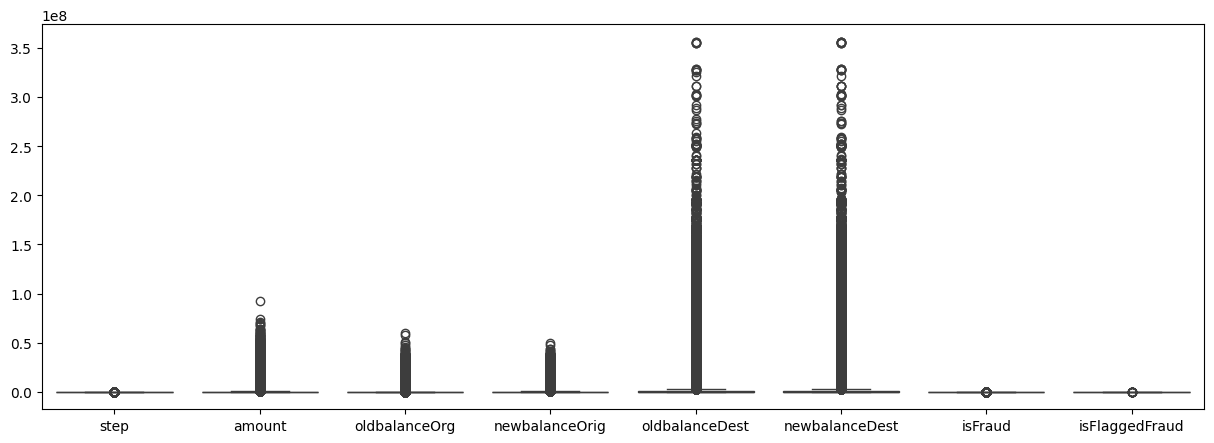

In [ ]:
plt.figure(figsize = (15, 5))
sns.boxplot(data=transactions)

In [ ]:
l_discret = list(transactions.select_dtypes(include="object"))
l_continu = list(set(transactions) - set(l_discret))

print(l_discret); print(l_continu)

['type']
['step', 'amount', 'isFraud', 'isFlaggedFraud', 'newbalanceOrig', 'newbalanceDest', 'oldbalanceOrg', 'oldbalanceDest']


<ipython-input-20-ca656ff2e45e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=transactions, palette='viridis')


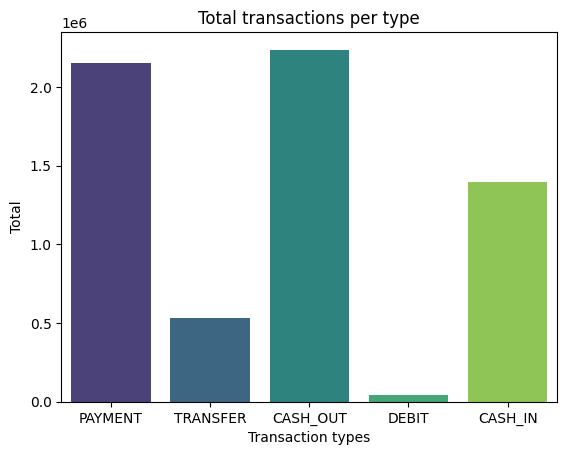

In [ ]:
# Plot categorical variables distribution
sns.countplot(x='type', data=transactions, palette='viridis')
plt.title("Total transactions per type")
plt.xlabel("Transaction types")
plt.ylabel("Total")
plt.show()

In [ ]:
transactions[transactions['isFraud'] == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

The graph above shows that 'TRANSFER' and 'CASH_OUT' are two mode of transactions that fraud happen.

In [ ]:
transactions['isFraud'].value_counts()

,count
isFraud,
0,6353880
1,8197


In [ ]:
# is Flagged Fraud: Flags large-scale unauthorized transfers between accounts, with any single transaction exceeding 200,000 considered illegal.
transactions[transactions['isFlaggedFraud'] == 1].shape[0] # Transaction amount > 200 000 dollars

16

In [ ]:
len(l_continu)

8

When applying normalization, choose the one that best suits the nature of the feature's distribution curve.


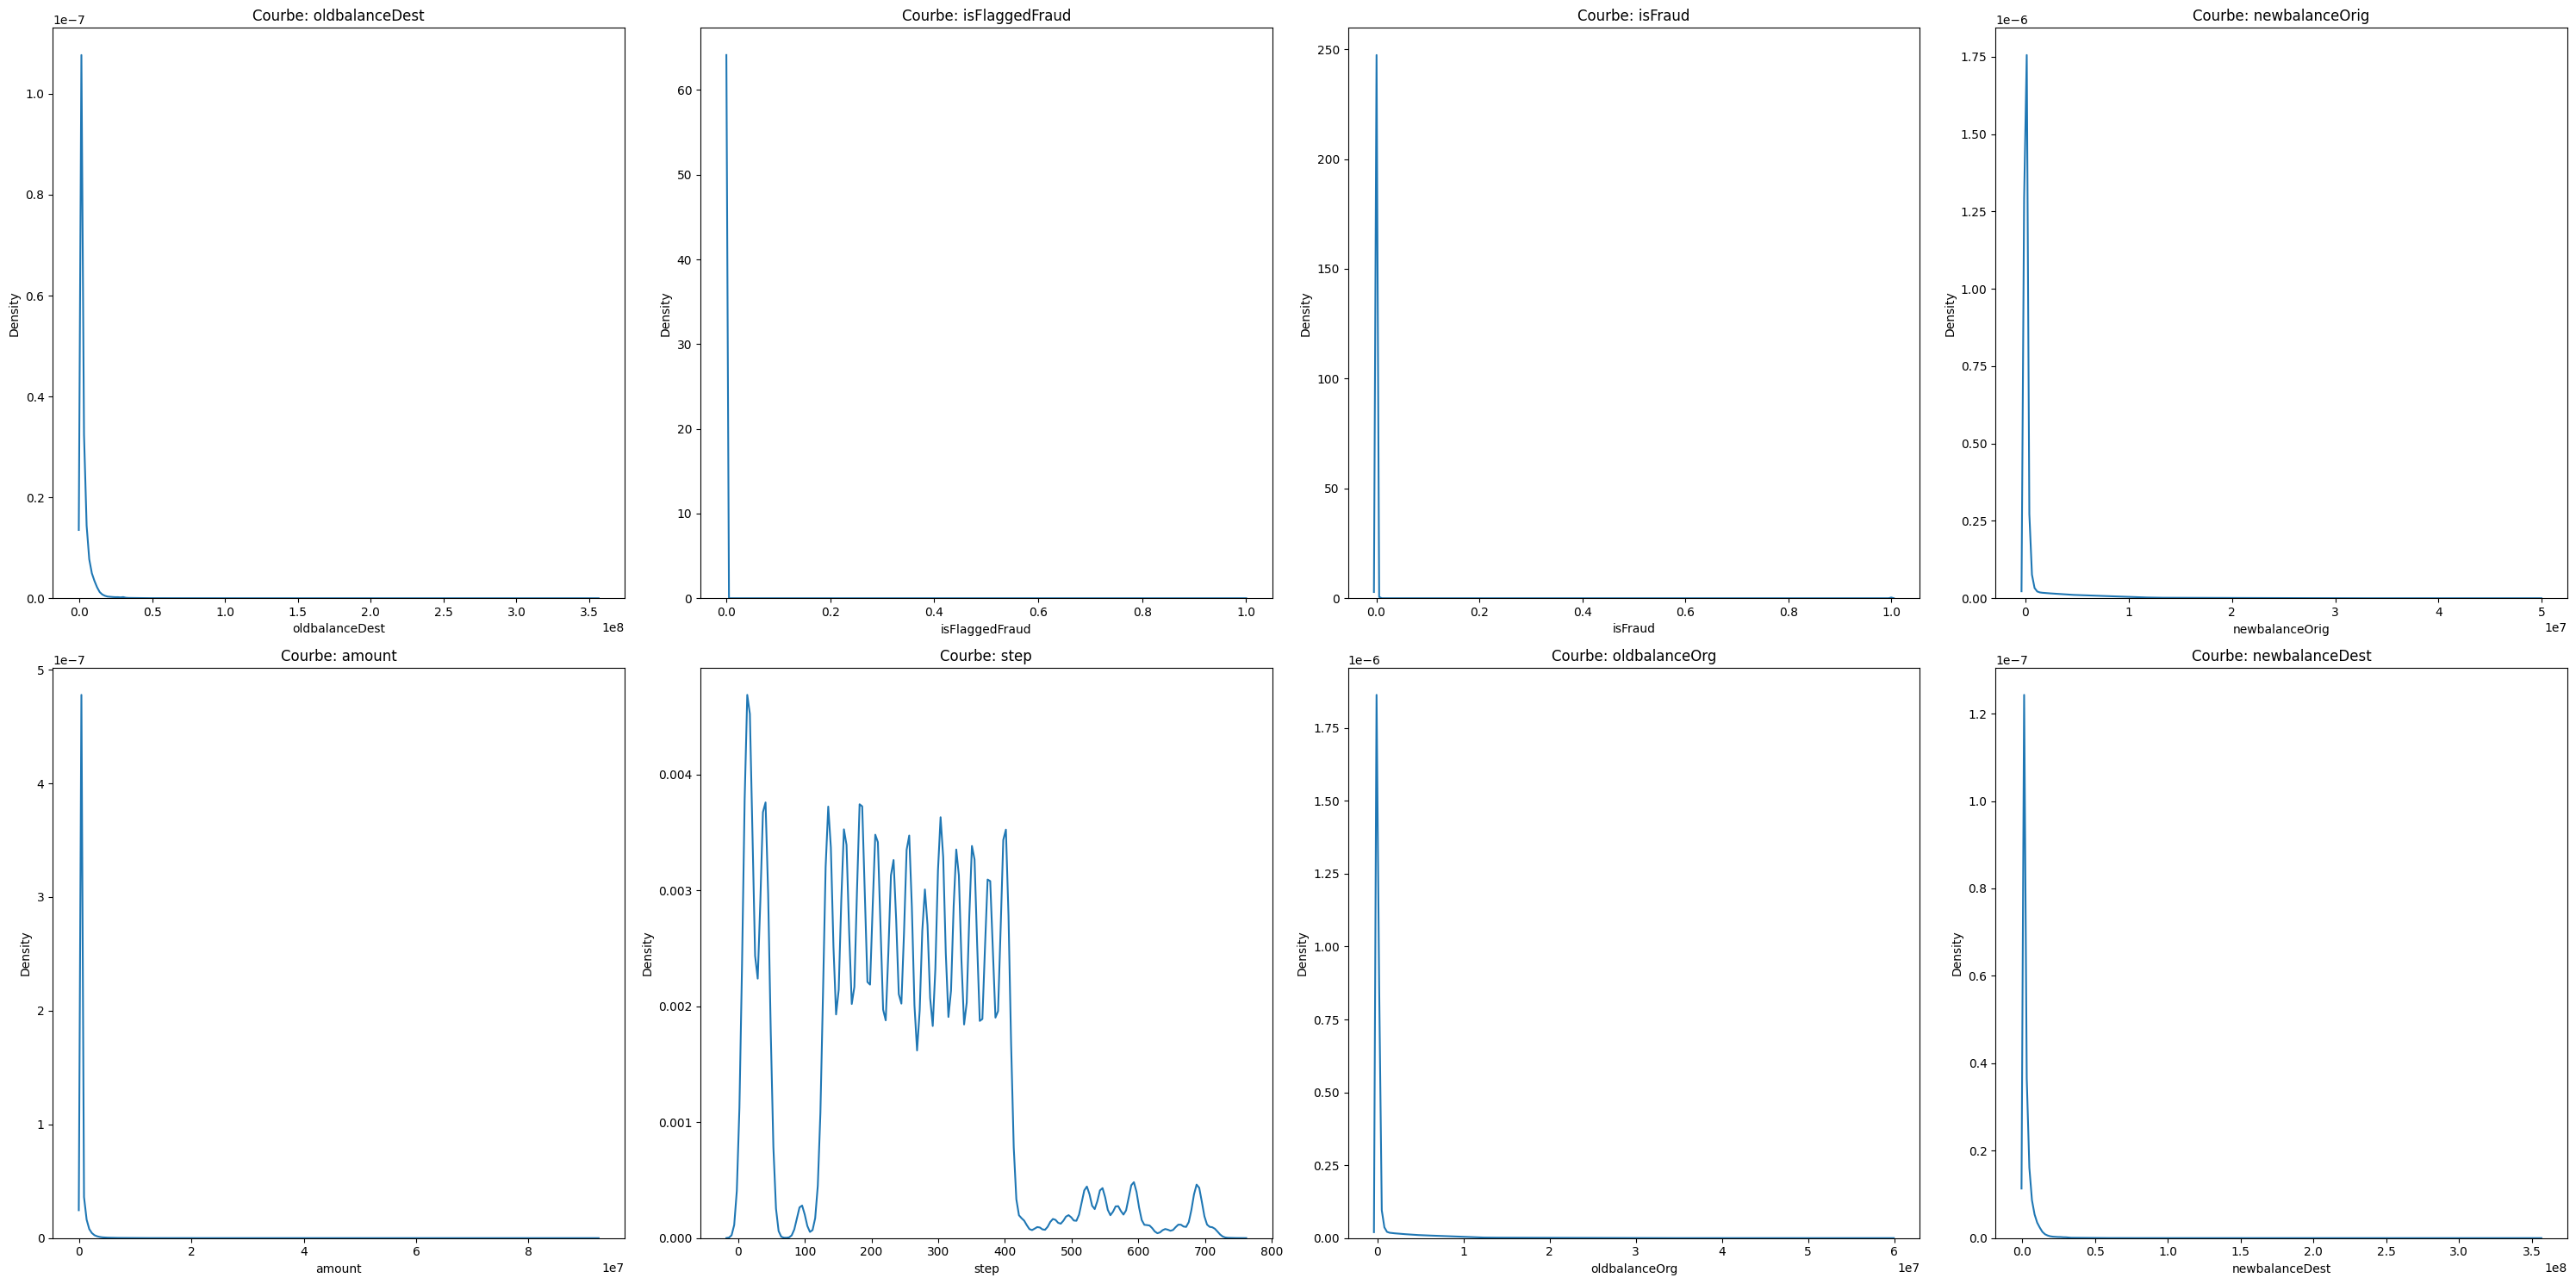

In [ ]:
# Visualize continuous variables distribution
plt.figure(figsize=(30, 15))
for i, element in enumerate(l_continu):
    plt.subplot(2, 4, i + 1)  # Adjust subgraph grid as needed
    sns.kdeplot(transactions[element], bw_method='scott', bw_adjust=1)
    plt.title(f"Courbe: {element}")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import gaussian_kde

In [ ]:
# Method 2
def distribution_type(data, column):

  mean = data[column].mean()
  median = data[column].median()

  kde = gaussian_kde(data[column])
  data.sort_values(by=column, inplace=True)
  x_vals = data[column].values
  y_vals = kde(x_vals)
  mode = x_vals[np.argmax(y_vals)]

  print(mean, median, mode)

  if ((mean == median) and ( median == mode)):
    return 0 # The distribution is symmetrical
  elif ((mode < median) and (median < mean)):
    return -1 # distribution right-skewed
  elif ((mean < median) and (median < mode)) :
    return 1 # distribution left-skewed
  else :
    return 5 # Any random number

Finding the correlation between the attributes (Pearson correlation matrix)¶


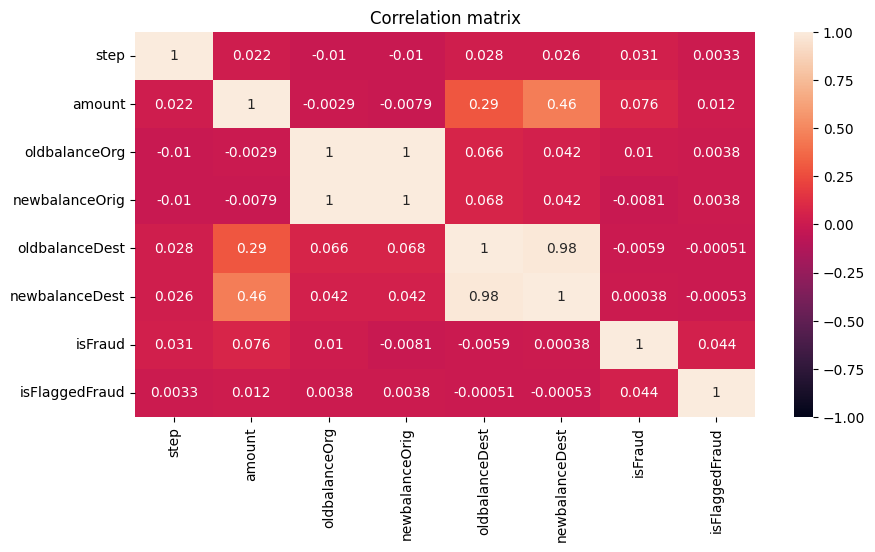

In [ ]:
df_corr = transactions.corr(numeric_only=True)
plt.figure(figsize = (10, 5))
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

In [ ]:
fraudTransactions = transactions[transactions['isFraud'] == 1]
nonFraudTransactions = transactions[transactions['isFraud'] == 0]

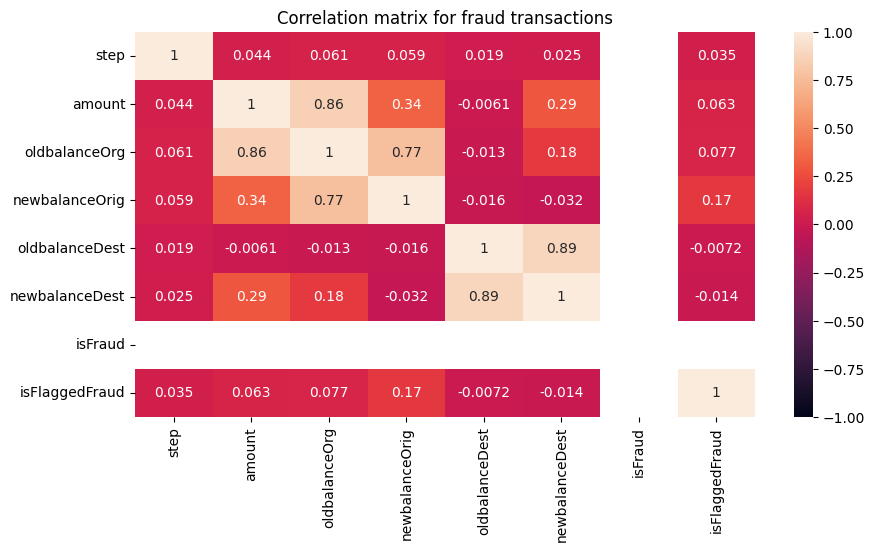

In [ ]:
plt.figure(figsize = (10, 5))
sns.heatmap(fraudTransactions.corr(numeric_only=True), annot=True, vmin=-1, vmax=1)
plt.title('Correlation matrix for fraud transactions')
plt.show()

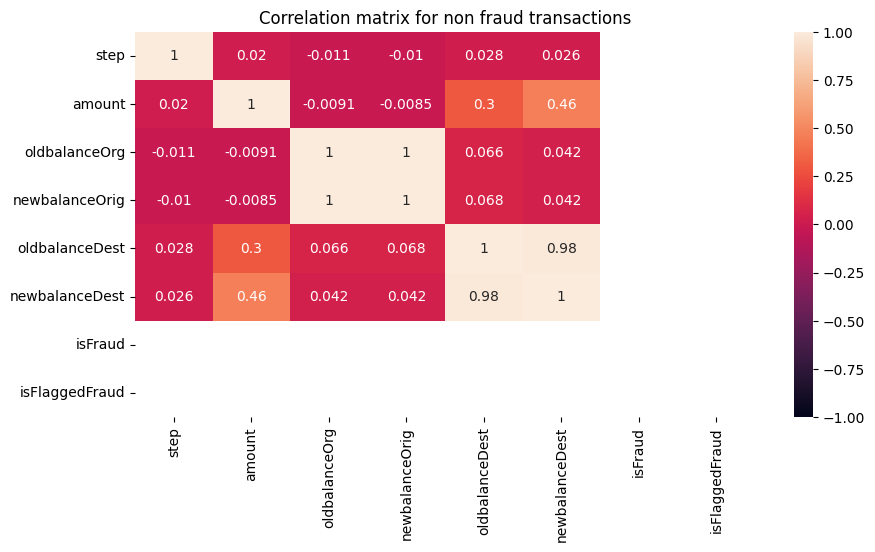

In [ ]:
plt.figure(figsize = (10, 5))
sns.heatmap(nonFraudTransactions.corr(numeric_only=True), annot=True, vmin=-1, vmax=1)
plt.title('Correlation matrix for non fraud transactions')
plt.show()

In [ ]:
print("Sum of fraudulent transactions = ",fraudTransactions.isFraud.count())

Sum of fraudulent transactions =  8197


In [ ]:
print("Sum of fraudulent transactions flagged as fraudulent = ", fraudTransactions[fraudTransactions['isFlaggedFraud'] == 1].shape[0])

Sum of fraudulent transactions flagged as fraudulent =  16


In [ ]:
16 / 4097 # Percentage of fraud transactions flagged as fraud transactions

0.003905296558457408

In [ ]:
print("Sum of non fraudulent transactions = ",transactions[transactions['isFraud'] == 0].shape[0])

Sum of non fraudulent transactions =  6353880


#Data Transformation

In [ ]:
# Define the order of categories
ord_categories = [["PAYMENT", "TRANSFER", "CASH_IN", "CASH_OUT", "DEBIT"]]
encoder = OrdinalEncoder(categories=ord_categories)
transactions['type'] = encoder.fit_transform(transactions[['type']])
transactions

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0.0,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,0.0,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,1.0,181.00,181.00,0.00,0.00,0.00,1,0
3,1,3.0,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,0.0,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362072,743,3.0,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362073,743,1.0,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362074,743,3.0,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362075,743,1.0,850002.52,850002.52,0.00,0.00,0.00,1,0


In [ ]:
# Removing the columns that are not necessary for the data modeling
# the columns that are not necessary are oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest
transactions.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'], axis = 1, inplace = True)
transactions

,step,type,amount,isFraud,isFlaggedFraud
0,1,0.0,9839.64,0,0
1,1,0.0,1864.28,0,0
2,1,1.0,181.00,1,0
3,1,3.0,181.00,1,0
4,1,0.0,11668.14,0,0
...,...,...,...,...,...
6362072,743,3.0,339682.13,1,0
6362073,743,1.0,6311409.28,1,0
6362074,743,3.0,6311409.28,1,0
6362075,743,1.0,850002.52,1,0


Based on "AMOUNT" feature, which exhibits a right-skewed distribution, the most appropriate transformation is Min-Max Scaling.

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler()
#transactions['amount'] = min_max_scaler.fit_transform(transactions[['amount']])

In [ ]:
transactions

,step,type,amount,isFraud,isFlaggedFraud
0,1,0.0,9839.64,0,0
1,1,0.0,1864.28,0,0
2,1,1.0,181.00,1,0
3,1,3.0,181.00,1,0
4,1,0.0,11668.14,0,0
...,...,...,...,...,...
6362072,743,3.0,339682.13,1,0
6362073,743,1.0,6311409.28,1,0
6362074,743,3.0,6311409.28,1,0
6362075,743,1.0,850002.52,1,0


In [ ]:
transactions.to_csv('/gdrive/MyDrive/Bank internship/model AI - Fraud detection/transactions.csv', index=False)

# Models

In [4]:
transactions = pd.read_csv("/gdrive/MyDrive/Bank internship/model AI - Fraud detection/transactions.csv", sep=",")
transactions

,step,type,amount,isFraud,isFlaggedFraud
0,1,0.0,9839.64,0,0
1,1,0.0,1864.28,0,0
2,1,1.0,181.00,1,0
3,1,3.0,181.00,1,0
4,1,0.0,11668.14,0,0
...,...,...,...,...,...
6362072,743,3.0,339682.13,1,0
6362073,743,1.0,6311409.28,1,0
6362074,743,3.0,6311409.28,1,0
6362075,743,1.0,850002.52,1,0


In [5]:
transactions = transactions[transactions['type'] == 1.0]
transactions = transactions.reset_index(drop=True)
transactions

,step,type,amount,isFraud,isFlaggedFraud
0,1,1.0,181.00,1,0
1,1,1.0,215310.30,0,0
2,1,1.0,311685.89,0,0
3,1,1.0,62610.80,0,0
4,1,1.0,42712.39,0,0
...,...,...,...,...,...
532904,742,1.0,63416.99,1,0
532905,743,1.0,1258818.82,1,0
532906,743,1.0,339682.13,1,0
532907,743,1.0,6311409.28,1,0


In [6]:
X = transactions.drop(['isFraud'], axis = 1)
y = transactions[['isFraud']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42 )

In [8]:
X_train # Before smote

,step,type,amount,isFlaggedFraud
292232,259,1.0,657673.88,0
430366,361,1.0,306991.00,0
138337,158,1.0,1132374.98,0
370236,324,1.0,291675.99,0
139902,159,1.0,279266.73,0
...,...,...,...,...
110268,137,1.0,38645.25,0
259178,236,1.0,421034.33,0
365838,322,1.0,2286173.65,0
131932,156,1.0,1751498.08,0


In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy=0.8)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [10]:
X_train.shape, y_train.shape

((666284, 4), (666284, 1))

In [11]:
X_train #After smote

,step,type,amount,isFlaggedFraud
0,259,1.0,6.576739e+05,0
1,361,1.0,3.069910e+05,0
2,158,1.0,1.132375e+06,0
3,324,1.0,2.916760e+05,0
4,159,1.0,2.792667e+05,0
...,...,...,...,...
666279,220,1.0,1.037116e+05,0
666280,588,1.0,1.619316e+06,0
666281,468,1.0,1.493913e+05,0
666282,299,1.0,1.532615e+06,0


In [12]:
X_test.shape, y_test.shape

((159873, 4), (159873, 1))

In [13]:
y_train[y_train['isFraud'] == 0].shape[0], y_train[y_train['isFraud'] == 1].shape[0]

(370158, 296126)

In [14]:
y_test[y_test['isFraud'] == 0].shape[0], y_test[y_test['isFraud'] == 1].shape[0]

(158654, 1219)

In [15]:
y_test

,isFraud
388572,0
242358,0
382377,0
191971,0
123756,0
...,...
52040,0
49582,0
166899,0
355368,0


In [16]:
scaler= MinMaxScaler()
X_train[['step', 'amount']] = scaler.fit_transform(X_train[['step', 'amount']])

In [17]:
X_train

,step,type,amount,isFlaggedFraud
0,0.347709,1.0,0.007114,0
1,0.485175,1.0,0.003321,0
2,0.211590,1.0,0.012249,0
3,0.435310,1.0,0.003155,0
4,0.212938,1.0,0.003021,0
...,...,...,...,...
666279,0.295148,1.0,0.001122,0
666280,0.791105,1.0,0.017516,0
666281,0.629380,1.0,0.001616,0
666282,0.401617,1.0,0.016579,0


In [18]:
scaler= MinMaxScaler()
X_test[['step', 'amount']] = scaler.fit_transform(X_test[['step', 'amount']])

In [19]:
X_test

,step,type,amount,isFlaggedFraud
388572,0.444744,1.0,0.000624,0
242358,0.307278,1.0,0.009880,0
382377,0.442049,1.0,0.003417,0
191971,0.252022,1.0,0.005977,0
123756,0.190027,1.0,0.002192,0
...,...,...,...,...
52040,0.045822,1.0,0.015514,0
49582,0.044474,1.0,0.011874,0
166899,0.241240,1.0,0.019044,0
355368,0.412399,1.0,0.002574,0


In [ ]:
#indices = y_test[y_test['isFraud'] == 1].index.tolist()

In [ ]:
#y_test = y_test[y_test['isFraud'] == 1]

In [ ]:
#X_test = X_test.loc[indices]
#X_test

,step,type,amount,isFlaggedFraud
125847,0.204852,1.0,0.001565,0
396624,0.458221,1.0,0.040788,0
88704,0.169811,1.0,0.005778,0
213031,0.276280,1.0,0.003193,0
202622,0.272237,1.0,0.000654,0
...,...,...,...,...
125059,0.203504,1.0,0.029466,0
46717,0.032345,1.0,0.000114,0
522945,0.818059,1.0,0.001847,0
500403,0.615903,1.0,0.002273,0


In [20]:
print(y_train[y_train['isFraud'] == 0].shape) # (370158, 1)
print(y_train[y_train['isFraud'] == 1].shape) # (2878, 1)

(370158, 1)
(296126, 1)


In [21]:
def classification_heatmap(object, cls, X, y):
  y_predict = cls.predict(X)
  c_m = confusion_matrix(y, y_predict)

  sns.heatmap(c_m, annot=True, cbar=True, xticklabels=cls.classes_, yticklabels=cls.classes_, fmt='d')
  plt.title(f'Confusion Matrix ({object})')
  plt.xlabel('Predicted Class')
  plt.ylabel('Actual Class')
  plt.show()

  return y_predict

In [22]:
# Weighted Averaging is beneficial for imbalanced datasets
def evaluation(y, y_predict):
  print("Accuracy: {:.5f}".format(accuracy_score(y, y_predict)))
  print("Weighted Average Recall: {:.5f}".format(recall_score(y, y_predict, average='weighted')))
  print("Weighted Average Precision: {:.5f}".format(precision_score(y, y_predict, average='weighted')))
  print("Weighted Average F1-Score: {:.5f}".format(f1_score(y, y_predict, average='weighted')))

In [23]:
def minority_class_evaluation(y, y_predict):
  print('---------------------------------------\n Evaluation scores for minority class \n---------------------------------------')
  print("Recall: {:.5f}".format(recall_score(y, y_predict, pos_label = 1)))
  print("Precision: {:.5f}".format(precision_score(y, y_predict, pos_label = 1)))
  print("F1-Score: {:.5f}".format(f1_score(y, y_predict, pos_label = 1)))

## Decision Tree Classifier

In [ ]:
cls1 = DecisionTreeClassifier()
cls1.fit(X_train,y_train)
cls1.classes_

array([0, 1])

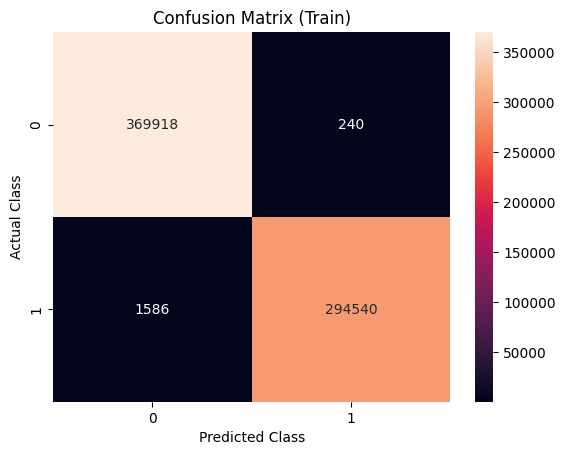

Accuracy: 0.99726
Weighted Average Recall: 0.99726
Weighted Average Precision: 0.99727
Weighted Average F1-Score: 0.99726
---------------------------------------
 Evaluation scores for minority class 
---------------------------------------
Recall: 0.99464
Precision: 0.99919
F1-Score: 0.99691


In [ ]:
# Training Data Validation
y_pred = classification_heatmap('Train', cls1, X_train, y_train)
evaluation(y_train, y_pred)
minority_class_evaluation(y_train, y_pred)

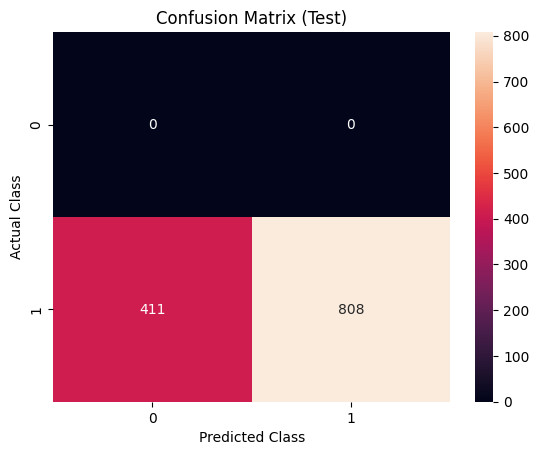

Accuracy: 0.66284
Weighted Average Recall: 0.66284
Weighted Average Precision: 1.00000
Weighted Average F1-Score: 0.79724
---------------------------------------
 Evaluation scores for minority class 
---------------------------------------
Recall: 0.66284
Precision: 1.00000
F1-Score: 0.79724


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Validation on Test Data
y_pred = classification_heatmap('Test', cls1, X_test, y_test)
evaluation(y_test, y_pred)
minority_class_evaluation(y_test, y_pred)

#Random Forest Classifier (Bagging)



Ensemble Learning :Techniques where several models are combined to improve the overall model performance

In [ ]:
parameters={'n_estimators':np.arange(10, 101, 10),
            'max_depth':np.arange(1, 11),
            'min_samples_split':np.arange(1, 11),
            'min_samples_leaf': np.arange(1, 11)
            }

rf = RandomForestClassifier(oob_score=True, max_samples=0.63, random_state=2)

# F1 score is used : which is a balance between precision and recall and is useful for imbalanced datasets
gs= RandomizedSearchCV(estimator=rf, param_distributions=parameters, scoring='f1', cv=5, n_iter=10, random_state=None)
gs.fit(X_train, y_train)
print("Best parameters:", gs.best_params_)
print(gs.best_score_)

In [ ]:
cls2 = gs.best_estimator_
cls2.fit(X_train, y_train)

In [ ]:
cls2 = RandomForestClassifier() #(max_depth=8, max_samples=0.63, min_samples_leaf=2, min_samples_split=4, oob_score=True, random_state=2)
cls2.fit(X_train, y_train)

In [ ]:
importances = cls2.feature_importances_

feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False, ignore_index=True)

print(feature_importances)
print(cls2.classes_)

          Feature  Importance
0            type    0.413197
1            step    0.330423
2          amount    0.254955
3  isFlaggedFraud    0.001425
[0 1]


In [ ]:
# Training Data Validation
y_pred = classification_heatmap('Train', cls2, X_train, y_train)
evaluation(y_train, y_pred)
minority_class_evaluation(y_train, y_pred)

In [ ]:
# Test Data Validation
y_pred = classification_heatmap('Test', cls2, X_test, y_test)
evaluation(y_test, y_pred)
minority_class_evaluation(y_test, y_pred)

#Boosting : AdaBoost

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=1) # weak learners

cls3 = AdaBoostClassifier(base_estimator=base_estimator) # Strong learner

param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 1, 10],
    'base_estimator__max_depth': [1, 2, 3, 4],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search = RandomizedSearchCV(estimator=cls3, param_distributions=param_grid, scoring='f1', cv=5, n_jobs=-1) # Use all available processors
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

cls3 = grid_search.best_estimator_

In [ ]:
cls3 = AdaBoostClassifier()
cls3.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

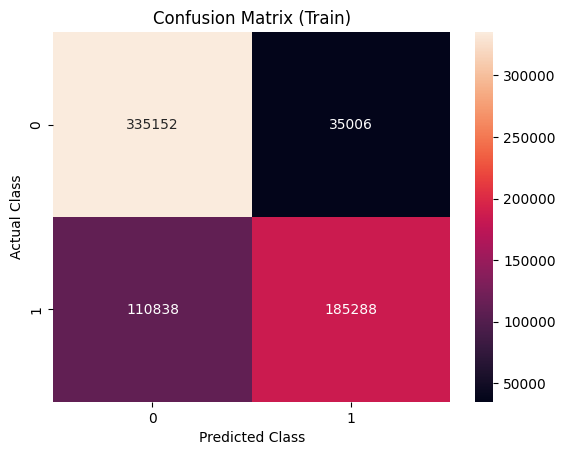

Accuracy: 0.78111
Weighted Average Recall: 0.78111
Weighted Average Precision: 0.79131
Weighted Average F1-Score: 0.77521
---------------------------------------
 Evaluation scores for minority class 
---------------------------------------
Recall: 0.62571
Precision: 0.84109
F1-Score: 0.71759


In [ ]:
# Training Data Validation
y_pred = classification_heatmap('Train', cls3, X_train, y_train)
evaluation(y_train, y_pred)
minority_class_evaluation(y_train, y_pred)

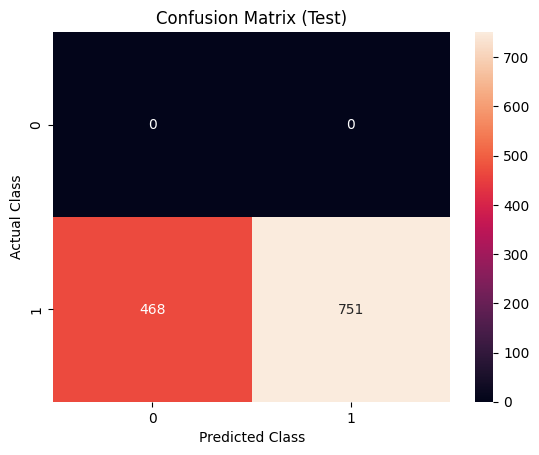

Accuracy: 0.61608
Weighted Average Recall: 0.61608
Weighted Average Precision: 1.00000
Weighted Average F1-Score: 0.76244
---------------------------------------
 Evaluation scores for minority class 
---------------------------------------
Recall: 0.61608
Precision: 1.00000
F1-Score: 0.76244


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Test Data Validation
y_pred = classification_heatmap('Test', cls3, X_test, y_test)
evaluation(y_test, y_pred)
minority_class_evaluation(y_test, y_pred)

#Stacking

In [ ]:
model = GradientBoostingClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(n_estimators=10, random_state=42)

In [ ]:
# Training Data Validation
y_pred = classification_heatmap('Train', model, X_train, y_train)
evaluation(y_train, y_pred)
minority_class_evaluation(y_train, y_pred)

In [ ]:
# Test Data Validation
y_pred = classification_heatmap('Train', model, X_test, y_test)
evaluation(y_test, y_pred)
minority_class_evaluation(y_test, y_pred)

In [ ]:
# Create a new dataset with the predictions
stacked_predictions = np.column_stack((cls1.predict_proba(X_test), cls2.predict_proba(X_test), cls3.predict_proba(X_test)))

# Define metamodel
meta_model = model

# Train the metamodel on the predictions of the base models
meta_model.fit(stacked_predictions, y_test)

# Predict with stacked model
meta_predictions = meta_model.predict(stacked_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Evaluate the accuracy of the stacked model
accuracy = accuracy_score(y_test, meta_predictions)
print(f'Accuracy of stacked model: {accuracy:.2f}')

Accuracy of stacked model: 1.00


In [ ]:
evaluation(y_test, meta_predictions)

Accuracy: 0.99999
Weighted Average Recall: 0.99999
Weighted Average Precision: 0.99999
Weighted Average F1-Score: 0.99999


In [ ]:
minority_class_evaluation(y_test, meta_predictions)

---------------------------------------
 Evaluation scores for minority class 
---------------------------------------
Recall: 0.99836
Precision: 1.00000
F1-Score: 0.99918


#Deep Learning model

A model can only be converted to TensorFlow Lite (which is supported for mobile development) if it is written using the TensorFlow framework.
Inspire from previous models

In [ ]:
#model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.keras",
#                                               monitor="val_accuracy",
#                                               mode="max",
#                                                save_best_only=True)

In [24]:
# Define the model
model = Sequential()

# Add layers
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50, batch_size=1024, verbose=1 ,callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.6623 - loss: 0.6523 - val_accuracy: 0.9007 - val_loss: 0.5321
Epoch 2/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7053 - loss: 0.5956 - val_accuracy: 0.9211 - val_loss: 0.5142
Epoch 3/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7060 - loss: 0.5917 - val_accuracy: 0.9198 - val_loss: 0.4966
Epoch 4/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7063 - loss: 0.5867 - val_accuracy: 0.9171 - val_loss: 0.4787
Epoch 5/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7054 - loss: 0.5850 - val_accuracy: 0.9296 - val_loss: 0.5002
Epoch 6/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7073 - loss: 0.5816 - val_accuracy: 0.9297 - val_loss: 0.4935
Epoch 7/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7093 - loss: 0.5801 - val_accuracy: 0.9270 - val_loss: 0.4802
Epoch 8/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7146 - loss: 0.5771 - val_accura

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

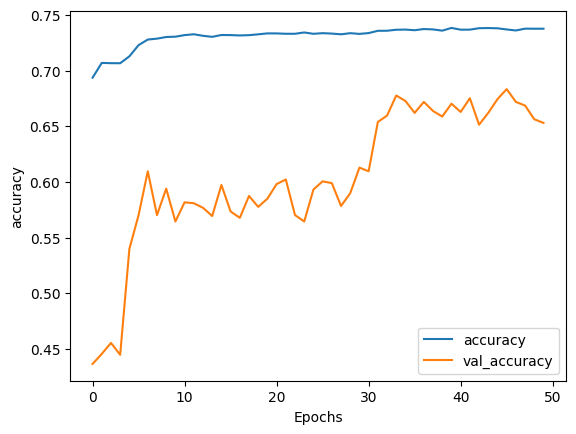

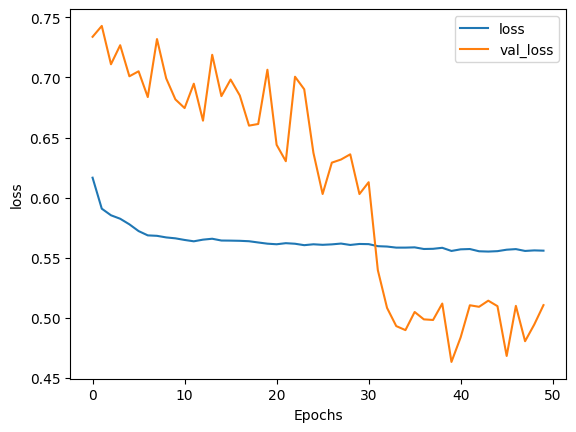

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, "loss")

In [ ]:
# Convert model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpxmefzn33'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133711249250384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133711249258128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133711249679184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133711249682000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133711247704832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133711247709056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133711247707824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133711247713456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133711247714688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133711247717856: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
# Save the TensorFlow Lite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)
print("The model was converted and saved in TensorFlow Lite format.")

The model was converted and saved in TensorFlow Lite format.


#Test "model.tflite"

In [ ]:
# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='model.tflite')
# Allocate tensors, which prepares memory for I/O
interpreter.allocate_tensors()

In [ ]:
# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
input_details

[{'name': 'serving_default_keras_tensor:0',
  'index': 0,
  'shape': array([1, 4], dtype=int32),
  'shape_signature': array([-1,  4], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [ ]:
output_details

[{'name': 'StatefulPartitionedCall_1:0',
  'index': 16,
  'shape': array([1, 1], dtype=int32),
  'shape_signature': array([-1,  1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [ ]:
mins = transactions.min()
mins

,0
step,1.0
type,1.0
amount,2.6
isFraud,0.0
isFlaggedFraud,0.0


In [ ]:
maxs = transactions.max()
maxs

,0
step,743.00
type,1.00
amount,92445516.64
isFraud,1.00
isFlaggedFraud,1.00


In [ ]:
import numpy as np

def predict(interpreter, sample, mins, maxs):
    input_shape = input_details[0]['shape']
    print(f"Expected input shape: {input_shape}")

    # Convert the sample to a numpy array with float32 data type
    sample = np.array(sample, dtype=np.float32)

    print(f"Input sample after scaling: {sample}")

    # Manually scale the selected features
    sample[0] = (sample[0] - mins[0]) / (maxs[0] - mins[0])
    sample[2] = (sample[2] - mins[2]) / (maxs[2] - mins[2])

    print(f"Input sample after scaling: {sample}")
    print(f"Input sample shape: {sample.shape}")

    # Verify if reshaping is necessaryc
    if sample.shape != tuple(input_shape):
        sample = np.reshape(sample, input_shape)
        print(f"Reshaped input sample: {sample}")

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], sample)

    # Run inference
    interpreter.invoke()

    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    print(f"Raw output data: {output_data}")

    # Assuming binary classification and output is a probability
    prediction = 1 if output_data[0][0] >= 0.5 else 0
    print(f"Predicted class: {prediction}")

    return prediction


In [ ]:
transactions

,step,type,amount,isFraud,isFlaggedFraud
0,1,1.0,181.00,1,0
1,1,1.0,215310.30,0,0
2,1,1.0,311685.89,0,0
3,1,1.0,62610.80,0,0
4,1,1.0,42712.39,0,0
...,...,...,...,...,...
532904,742,1.0,63416.99,1,0
532905,743,1.0,1258818.82,1,0
532906,743,1.0,339682.13,1,0
532907,743,1.0,6311409.28,1,0


In [ ]:
predict(interpreter, np.array([250,	1.0, 190, 0]), mins, maxs)

Expected input shape: [1 4]
Input sample after scaling: [250.   1. 190.   0.]
Input sample after scaling: [3.355795e-01 1.000000e+00 2.027140e-06 0.000000e+00]
Input sample shape: (4,)
Reshaped input sample: [[3.355795e-01 1.000000e+00 2.027140e-06 0.000000e+00]]
Raw output data: [[0.35548097]]
Predicted class: 0


<ipython-input-37-5e2a745b39f4>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample[0] = (sample[0] - mins[0]) / (maxs[0] - mins[0])
<ipython-input-37-5e2a745b39f4>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample[2] = (sample[2] - mins[2]) / (maxs[2] - mins[2])


0

In [ ]:
X_train

,step,type,amount,isFlaggedFraud
0,0.347709,1.0,0.007114,0
1,0.485175,1.0,0.003321,0
2,0.211590,1.0,0.012249,0
3,0.435310,1.0,0.003155,0
4,0.212938,1.0,0.003021,0
...,...,...,...,...
666279,0.295148,1.0,0.001122,0
666280,0.791105,1.0,0.017516,0
666281,0.629380,1.0,0.001616,0
666282,0.401617,1.0,0.016579,0
